# 4. 数据清洗

主要介绍缺失值的处理、字符串的处理、重复项和赋值问题等。

+ 格式转换
+ 缺失值处理
+ 异常值处理

In [1]:
import pandas as pd
import numpy as np

##  4.1 处理缺失值

缺失数据在大部分数据分析应用里面都很常见。pandas的设计目标之一就是让缺失数据处理起来尽量轻松。主要有如下函数，详细的介绍见[官方文档](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-missing)

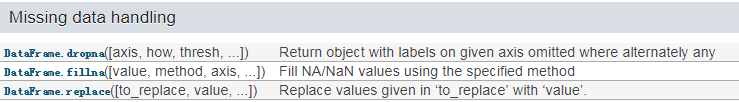

**滤除缺失值**，用dropna函数进行滤除

In [6]:
data = {'id':[1001,1002,1003,1004,1005,1006], 
        'date':pd.date_range('20130102', periods=6),
        'city':['Beijing ', np.nan, ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
        'age':[23,44,54,32,34,32],
        'category':['100-A','100-B','110-A','110-C','210-A','130-F'],
        'price':[1200,np.nan,2133,5433,np.nan,4432]}
df = pd.DataFrame(data,columns =['id','date','city','category','age','price'],index=['one','two','three','four','five','six'])

In [11]:
df.loc['one']=np.nan
df

,id,date,city,category,age,price
one,NaN,NaT,NaN,NaN,NaN,NaN
two,1002.0,2013-01-03,NaN,100-B,44.0,NaN
three,1003.0,2013-01-04,guangzhou,110-A,54.0,2133.0
four,1004.0,2013-01-05,Shenzhen,110-C,32.0,5433.0
five,1005.0,2013-01-06,shanghai,210-A,34.0,NaN
six,1006.0,2013-01-07,BEIJING,130-F,32.0,4432.0


In [17]:
df=df.dropna(how='all',axis=0)
df

,id,date,city,category,age,price
two,1002.0,2013-01-03,NaN,100-B,44.0,NaN
three,1003.0,2013-01-04,guangzhou,110-A,54.0,2133.0
four,1004.0,2013-01-05,Shenzhen,110-C,32.0,5433.0
five,1005.0,2013-01-06,shanghai,210-A,34.0,NaN
six,1006.0,2013-01-07,BEIJING,130-F,32.0,4432.0


In [4]:
df.dropna()#滤除任何含有缺失值的行

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [ ]:
df.dropna(axis=1)#针对列向有nan值的情况

In [ ]:
df

In [ ]:
df.dropna(how='all')

In [ ]:
df.iloc[1]=np.nan#将第二行设置全为空
df.dropna(how='all')#how='all'只针对全为空的行；如果加上axis=1，则只针对全为空的列

在很多情况下，你可能不想滤除缺失值，而是想通过其他方式填补这些空洞。

**填充缺失值**，pandas提供了fillna()函数

In [56]:
data = {'id':[1001,1002,1003,1004,1005,1006], 
        'date':pd.date_range('20130102', periods=6),
        'city':['Beijing ', np.nan, ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
        'age':[23,44,54,32,np.nan,32],
        'category':['100-A','100-B','110-A','110-C','210-A','130-F'],
        'price':[1200,np.nan,2133,5433,np.nan,4432]}
df = pd.DataFrame(data,columns =['id','date','city','category','age','price'],index=['one','two','three','four','five','six'])
#df.fillna(0)#可以直接进行填充
#也可以通过字典进行填充
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23.0,1200.0
two,1002,2013-01-03,NaN,100-B,44.0,NaN
three,1003,2013-01-04,guangzhou,110-A,54.0,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32.0,5433.0
five,1005,2013-01-06,shanghai,210-A,NaN,NaN
six,1006,2013-01-07,BEIJING,130-F,32.0,4432.0


In [25]:
df.fillna({'price':2000,'city':'Unkown'})

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23.0,1200.0
two,1002,2013-01-03,Unkown,100-B,44.0,2000.0
three,1003,2013-01-04,guangzhou,110-A,54.0,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32.0,5433.0
five,1005,2013-01-06,shanghai,210-A,NaN,2000.0
six,1006,2013-01-07,BEIJING,130-F,32.0,4432.0


In [23]:
df['city']=df['city'].fillna('Shenzhen')
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23.0,1200.0
two,1002,2013-01-03,Shenzhen,100-B,44.0,NaN
three,1003,2013-01-04,guangzhou,110-A,54.0,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32.0,5433.0
five,1005,2013-01-06,shanghai,210-A,NaN,NaN
six,1006,2013-01-07,BEIJING,130-F,32.0,4432.0


In [25]:
df['price']=df['price'].fillna(1500.0)
df['city']=df['city'].fillna('Unkown')
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,Unkown,100-B,44,1500.0
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,1500.0
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [34]:
df.fillna({'price':3000.0,'city':'Unkown'},inplace=True)
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,Unkown,100-B,44,3000.0
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,3000.0
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [ ]:
#fillna默认返回新对象，但也可以通过修改参数对现有对象进行就地修改
df.fillna({'price':3000.0},inplace=True)#通过设置inplace=Ture，可以保证每次返回的被填充对象的引用
df

In [35]:
df.iloc[2:,4]=np.nan
df.iloc[3:5,5]=np.nan
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23.0,1200.0
two,1002,2013-01-03,Unkown,100-B,44.0,3000.0
three,1003,2013-01-04,guangzhou,110-A,NaN,2133.0
four,1004,2013-01-05,Shenzhen,110-C,NaN,NaN
five,1005,2013-01-06,shanghai,210-A,NaN,NaN
six,1006,2013-01-07,BEIJING,130-F,NaN,4432.0


In [38]:
df.fillna(method='ffill')

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23.0,1200.0
two,1002,2013-01-03,Unkown,100-B,44.0,3000.0
three,1003,2013-01-04,guangzhou,110-A,44.0,2133.0
four,1004,2013-01-05,Shenzhen,110-C,44.0,2133.0
five,1005,2013-01-06,shanghai,210-A,44.0,2133.0
six,1006,2013-01-07,BEIJING,130-F,44.0,4432.0


In [39]:
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23.0,1200.0
two,1002,2013-01-03,Unkown,100-B,44.0,3000.0
three,1003,2013-01-04,guangzhou,110-A,NaN,2133.0
four,1004,2013-01-05,Shenzhen,110-C,NaN,NaN
five,1005,2013-01-06,shanghai,210-A,NaN,NaN
six,1006,2013-01-07,BEIJING,130-F,NaN,4432.0


也可以通过replace()对缺失值进行处理。

在这里顺便也扩展一下replace()。

In [34]:
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23.0,1200.0
two,1002,2013-01-03,NaN,100-B,44.0,NaN
three,1003,2013-01-04,guangzhou,110-A,54.0,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32.0,5433.0
five,1005,2013-01-06,shanghai,210-A,NaN,NaN
six,1006,2013-01-07,BEIJING,130-F,32.0,4432.0


In [68]:
df['city']=df['city'].replace('SH','Shanghai')
# df['city']=df['city'].str.upper()
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,Shanghai,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [57]:
df['city']=df['city'].str.lower().str.replace('h','--')
df

,id,date,city,category,age,price
one,1001,2013-01-02,beijing,100-A,23.0,1200.0
two,1002,2013-01-03,NaN,100-B,44.0,NaN
three,1003,2013-01-04,guangz--ou,110-A,54.0,2133.0
four,1004,2013-01-05,s--enz--en,110-C,32.0,5433.0
five,1005,2013-01-06,s--ang--ai,210-A,NaN,NaN
six,1006,2013-01-07,beijing,130-F,32.0,4432.0


## 4.2 字符串处理

Series包含专门的字符串的处理函数，详情见[官方文档](http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling)。

pandas也包含了很多字符串的处理方法，我们主要介绍比较常用的：
+ contains
+ strip
+ split
+ lower和upper、title
+ join

In [39]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca cca', np.nan, 'CABA', 'dog', 'cat'])
s

0           A
1           B
2           C
3        Aaba
4    Baca cca
5         NaN
6        CABA
7         dog
8         cat
dtype: object

In [67]:
s.str.lower()#全部转化为小写

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [68]:
s.str.upper()#全部转化为大写

0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object

In [40]:
s.str.len()#每个元素字符串的长度

0    1.0
1    1.0
2    1.0
3    4.0
4    8.0
5    NaN
6    4.0
7    3.0
8    3.0
dtype: float64

In [50]:
idx = pd.Series([' \njack'+'\n', '\rjill ', ' jesse ', 'fra nk'])
# print(idx)
idx.str.strip()#去除空白字符\n\t\r

0      jack
1      jill
2     jesse
3    fra nk
dtype: object

In [54]:
df = pd.DataFrame(np.random.randn(3, 2), columns=[' Column A ', ' Column B '],index=range(3))
# df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')#对列名称去除空白符，并且用‘-’代替字之间的‘ ’
# df.columns=df.columns.str.upper().str.strip().str.replace(' ','-')
# df.columns=df.columns.str.strip().str.replace(' ','-')
df

,Column-A,Column-B
0,-0.727816,-0.822175
1,0.113583,-0.702666
2,0.115948,0.320957


In [76]:
a=list('abc')
'_'.join(a)

'a_b_c'

In [47]:
a=['a','b','c']
''.join(a)

'abc'

In [64]:
s2 = pd.Series(['acccc_b_c', 'c_d_e', np.nan, 'f_g_h','a'])
print(s2)
# s2.str.split('_').str.join('/')
# s2=s2.str.split('_').str.join(',')
# # s2.str.split('_')#按照‘-’进行拆分
# s2

0    acccc_b_c
1        c_d_e
2          NaN
3        f_g_h
4            a
dtype: object


In [71]:
s2

0    acccc_b_c
1        c_d_e
2          NaN
3        f_g_h
4            a
dtype: object

In [80]:
s2.str.contains('a',na=False) #检查每个元素是否包含‘a’

0     True
1    False
2    False
3    False
dtype: bool

In [75]:
s2.str.startswith('a',na=False)

0     True
1    False
2    False
3    False
4     True
dtype: bool

In [52]:
s2.str.endswith('a',na=False)

0    False
1    False
2    False
3    False
4     True
dtype: bool

更多的操作方法见官方的文档的[Working with Text Data](http://pandas.pydata.org/pandas-docs/stable/text.html#working-with-text-data)

## 4.3 数据转换

接下来我们学习数据过滤、清洗以及其他的转换工作。

### 4.3.1 删除重复项

In [81]:
data=pd.DataFrame({'k1':['one']*3+['two']*4,
                   'k2':[1,1,2,3,3,4,4],'k3':[1,2,3,4,5,6,7]})
data
# data.duplicated()#判断各行是否有重复项

,k1,k2,k3
0,one,1,1
1,one,1,2
2,one,2,3
3,two,3,4
4,two,3,5
5,two,4,6
6,two,4,7


In [87]:
data.drop_duplicates()#将各行的重复项进行删除

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


duplicated()和drop_duplicates()默认的是全部列，我们也可以指定某一列过滤重复项

In [69]:
data['v1']=np.arange(7)#为了表示的更加清楚，在添加一列
data
data['v1'].iloc[3:7]=5 
data=data.drop_duplicates(['k1','k2'],keep='last')

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### 4.3.2 重命名轴索引

In [100]:
data = pd.DataFrame(np.arange(12).reshape(3,4),index=['Shenzhen','Shanghai','Beijing'],columns=['one','two','three','four'])
# print(data)
# data.index = data.index.str.upper()
data

,one,two,three,four
Shenzhen,0,1,2,3
Shanghai,4,5,6,7
Beijing,8,9,10,11


In [101]:
data.index=data.index.str.upper()
data

,one,two,three,four
SHENZHEN,0,1,2,3
SHANGHAI,4,5,6,7
BEIJING,8,9,10,11


In [93]:
data.rename(index={'BEIJING':'DONGGUAN','SHENZHEN':"DONGGUAN"})

,one,two,three,four
DONGGUAN,0,1,2,3
SHANGHAI,4,5,6,7
DONGGUAN,8,9,10,11


In [76]:
data.rename(index=str.title,columns=str.upper)#对行名和列名进行相应的处理

,ONE,TWO,THREE,FOUR
Shenzhen,0,1,2,3
Shanghai,4,5,6,7
Beijing,8,9,10,11


In [98]:
data.rename(index={'SHENZHEN':'Guangzhou'},columns={'three':'python'})#也可以传入字典，对部分轴进行更新

,one,two,python,four
Guangzhou,0,1,2,3
SHANGHAI,4,5,6,7
BEIJING,8,9,10,11


### 4.3.3 离散化

为了便于分析，连续数据常常需要被离散化或者拆分为“面元”。需要用到cut()和qcut()函数。

cut()函数的面向边界对数据进行划分。函数详情点击[这里](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html#pandas.cut)。

In [125]:
age = np.random.randint(20,60,12)
print(age)
bins=[20,30,40,50,60]
cats=pd.cut(age,bins)
print(cats)
print(cats.value_counts())

[45 46 34 29 52 47 23 35 41 51 40 31]
[(40, 50], (40, 50], (30, 40], (20, 30], (50, 60], ..., (30, 40], (40, 50], (50, 60], (30, 40], (30, 40]]
Length: 12
Categories (4, interval[int64]): [(20, 30] < (30, 40] < (40, 50] < (50, 60]]
(20, 30]    2
(30, 40]    4
(40, 50]    4
(50, 60]    2
dtype: int64


In [126]:
li=['one','two','three','four']
cats=pd.cut(age,4,right=False,labels=li)#根据最大值最小值等长划分
print(cats)
print(cats.value_counts())

[four, four, two, one, four, ..., two, three, four, three, two]
Length: 12
Categories (4, object): [one < two < three < four]
one      2
two      3
three    2
four     5
dtype: int64


qcut()函数可以根据样本的分位数对数据进行面元划分。了解函数参数和更多用法点击[这里](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html#pandas.qcut)。

In [132]:
data = np.random.randn(1000)

In [135]:
pd.cut(data,bins=5).value_counts()

(-3.193, -1.94]     23
(-1.94, -0.692]    236
(-0.692, 0.555]    441
(0.555, 1.802]     270
(1.802, 3.05]       30
dtype: int64

In [136]:
pd.qcut(data,q=5).value_counts()

(-3.1879999999999997, -0.874]    200
(-0.874, -0.269]                 200
(-0.269, 0.266]                  200
(0.266, 0.847]                   200
(0.847, 3.05]                    200
dtype: int64

In [138]:
pd.qcut(data,q=[0,0.2,0.5,1]).value_counts()

(-3.1879999999999997, -0.874]    200
(-0.874, 0.0048]                 300
(0.0048, 3.05]                   500
dtype: int64

# 练习

什么样的数据叫做脏数据/有问题的数据？我们用'311-service-requests.csv'服务请求数据来一起看看，这个数据量不算小，同时也有一些东西确实可以处理一下。

其实也没有特别好的办法，还是得先拿点数据出来看看。比如说我们这里观察到邮政编码可能有问题的字段。

需要提到的一点是 .unique() 函数有很巧的用处，我们把所有出现过的邮政编码列出来（之后再看看分布？），也许会有一些想法。

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
requests = pd.read_csv('data/311-service-requests.csv')
requests['Incident Zip'].unique()

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


array([11432.0, 11378.0, 10032.0, 10023.0, 10027.0, 11372.0, 11419.0,
       11417.0, 10011.0, 11225.0, 11218.0, 10003.0, 10029.0, 10466.0,
       11219.0, 10025.0, 10310.0, 11236.0, nan, 10033.0, 11216.0, 10016.0,
       10305.0, 10312.0, 10026.0, 10309.0, 10036.0, 11433.0, 11235.0,
       11213.0, 11379.0, 11101.0, 10014.0, 11231.0, 11234.0, 10457.0,
       10459.0, 10465.0, 11207.0, 10002.0, 10034.0, 11233.0, 10453.0,
       10456.0, 10469.0, 11374.0, 11221.0, 11421.0, 11215.0, 10007.0,
       10019.0, 11205.0, 11418.0, 11369.0, 11249.0, 10005.0, 10009.0,
       11211.0, 11412.0, 10458.0, 11229.0, 10065.0, 10030.0, 11222.0,
       10024.0, 10013.0, 11420.0, 11365.0, 10012.0, 11214.0, 11212.0,
       10022.0, 11232.0, 11040.0, 11226.0, 10281.0, 11102.0, 11208.0,
       10001.0, 10472.0, 11414.0, 11223.0, 10040.0, 11220.0, 11373.0,
       11203.0, 11691.0, 11356.0, 10017.0, 10452.0, 10280.0, 11217.0,
       10031.0, 11201.0, 11358.0, 10128.0, 11423.0, 10039.0, 10010.0,
       11209.0,

下面我们就把unique()用起来，然后你会发现，确确实实是存在一些问题的，比如：
+ 为什么大部分被解析出数值，而有些被解析出字符串了？
+ 好多缺省值（nan）
+ 格式不一样，有些是29616-0759，有些是83
+ 有一些pandas不认的，比如'N/A'或者'NO CLUE'

那我们能做什么呢？
+ 规整'N/A'和'NO CLUE'到缺省值的“队列”里
+ 看看83是什么鬼，然后再决定怎么处理
+ 统一一下，全处理成字符串好啦

In [140]:
na_values = ['NO CLUE', 'N/A', '0','000000','00000']
requests = pd.read_csv('data/311-service-requests.csv',na_values=na_values, dtype={'Incident Zip': str})
requests['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

发现有5个，打算直接把这些都设置成缺省值(nan)的：requests[requests['Incident Zip'].str.contains('-').fillna(False)]['Incident Zip'] = np.nan。

后来查了查，发现邮编只有5位数，前五位确实是真是存在的邮编。所以需要截取一下。

In [151]:
# requests['Incident Zip'][requests['Incident Zip'].str.len()>5]

In [141]:
requests['Incident Zip']=requests['Incident Zip'].str.slice(0,5)#对字符的前位进行切片提取
requests['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

发现'00000'根本不是什么美国加拿大的邮编，所以这个是不能这么处理的，还真得重新设为缺省值。

In [150]:
# requests.loc[requests['Incident Zip']=='00000','Incident Zip']=np.nan
# unique_zips=requests['Incident Zip'].fillna(False).unique().astype('str')
# unique_zips.sort()
# unique_zips

0或者1开始的比较正确的邮编

In [148]:
zips = requests['Incident Zip']
# 用is_close表示0或者1开始的比较正确的邮编
is_close = zips.str.startswith('0') | zips.str.startswith('1')
# 非缺省值但不以0或者1开始的邮编认为是有些困惑的
is_far = ~(is_close) & zips.notnull()
requests.loc[is_far,'Incident Zip']=np.nan

In [149]:
requests['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

刚才做的一大堆工作，其实只是告诉你，我们可以这样去处理和补齐数据。
但你实际上会发现，好像其实用city直接对应一下就可以补上一些东西啊。

In [ ]:
requests['City'].str.upper().value_counts()

### 汇总一下

所以汇总一下，我们在邮编这个字段，是这样做数据清洗的：

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [112]:
na_values = ['NO CLUE', 'N/A', '0']
requests = pd.read_csv('data/311-service-requests.csv',na_values=na_values,dtype={'Incident Zip': str})

In [113]:
def fix_zip_codes(zips):
    # 获取前五位
    zips = zips.str.slice(0, 5)
    
    # 设置00000位空值
    zero_zips = zips == '00000'
    zips[zero_zips] = np.nan
    
    return zips

In [114]:
requests['Incident Zip'] = fix_zip_codes(requests['Incident Zip'])

In [115]:
requests['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',